## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import friedman3Dataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np

## Import Dataset 


In [3]:
n_features = 4
n_samples= 100
n_target = 1
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  41.586375  1301.994559  0.300783  7.696010  1.619582
1  54.909924  1281.738169  0.711472  5.450245  1.497806
2  30.409867   899.826693  0.139535  1.132621  1.280680
3  55.499786   294.232646  0.447014  4.797096  1.080631
4  33.968631   878.705740  0.909350  2.418394  1.472136


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)

print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(80, 4)
(80,)
(20, 4)
(20,)


## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              26.66
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                    7.84e-14
Time:                        16:18:04   Log-Likelihood:                         -82.103
No. Observations:                  80   AIC:                                      172.2
Df Residuals:                      76   BIC:                                      181.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

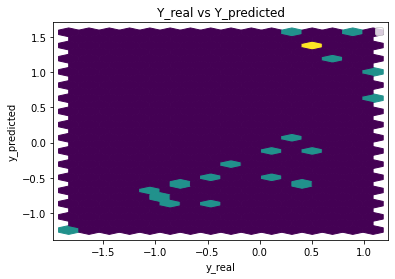

Performance Metrics
Mean Squared Error: 0.31483410669292405
Mean Absolute Error: 0.45639641922173757
Manhattan distance: 9.127928384434751
Euclidean distance: 2.5093190578040256


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)

Learning rate set to 0.027471
0:	learn: 1.0330035	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0232192	total: 59ms	remaining: 29.4s
2:	learn: 1.0122298	total: 60ms	remaining: 19.9s
3:	learn: 0.9979143	total: 61.1ms	remaining: 15.2s
4:	learn: 0.9854408	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9747027	total: 62.9ms	remaining: 10.4s
6:	learn: 0.9628210	total: 63.5ms	remaining: 9.01s
7:	learn: 0.9504065	total: 64.6ms	remaining: 8.01s
8:	learn: 0.9398901	total: 65.2ms	remaining: 7.18s
9:	learn: 0.9306556	total: 65.8ms	remaining: 6.51s
10:	learn: 0.9196721	total: 66.3ms	remaining: 5.96s
11:	learn: 0.9091613	total: 66.9ms	remaining: 5.51s
12:	learn: 0.8970767	total: 67.4ms	remaining: 5.12s
13:	learn: 0.8877147	total: 68ms	remaining: 4.79s
14:	learn: 0.8766033	total: 70.7ms	remaining: 4.64s
15:	learn: 0.8668388	total: 71.5ms	remaining: 4.4s
16:	learn: 0.8565000	total: 72.4ms	remaining: 4.18s
17:	learn: 0.8469222	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8382507	total: 77.3ms	remaining: 3.99s

38:	learn: 0.6722344	total: 90.2ms	remaining: 2.22s
39:	learn: 0.6645917	total: 91.2ms	remaining: 2.19s
40:	learn: 0.6568455	total: 91.7ms	remaining: 2.14s
41:	learn: 0.6497274	total: 92.2ms	remaining: 2.1s
42:	learn: 0.6424836	total: 92.5ms	remaining: 2.06s
43:	learn: 0.6372050	total: 93ms	remaining: 2.02s
44:	learn: 0.6310971	total: 93.7ms	remaining: 1.99s
45:	learn: 0.6246918	total: 94.3ms	remaining: 1.95s
46:	learn: 0.6182650	total: 94.8ms	remaining: 1.92s
47:	learn: 0.6120205	total: 95.2ms	remaining: 1.89s
48:	learn: 0.6051983	total: 95.7ms	remaining: 1.86s
49:	learn: 0.5995099	total: 96.2ms	remaining: 1.83s
50:	learn: 0.5931070	total: 96.8ms	remaining: 1.8s
51:	learn: 0.5871750	total: 97.3ms	remaining: 1.77s
52:	learn: 0.5811165	total: 97.8ms	remaining: 1.75s
53:	learn: 0.5749284	total: 98.3ms	remaining: 1.72s
54:	learn: 0.5684322	total: 98.9ms	remaining: 1.7s
55:	learn: 0.5630648	total: 99.4ms	remaining: 1.68s
56:	learn: 0.5565989	total: 99.7ms	remaining: 1.65s
57:	learn: 0.5515

169:	learn: 0.2585219	total: 150ms	remaining: 730ms
170:	learn: 0.2570623	total: 150ms	remaining: 728ms
171:	learn: 0.2557244	total: 151ms	remaining: 725ms
172:	learn: 0.2539183	total: 151ms	remaining: 722ms
173:	learn: 0.2526254	total: 151ms	remaining: 719ms
174:	learn: 0.2510950	total: 152ms	remaining: 716ms
175:	learn: 0.2499288	total: 153ms	remaining: 714ms
176:	learn: 0.2488469	total: 153ms	remaining: 712ms
177:	learn: 0.2478359	total: 153ms	remaining: 709ms
178:	learn: 0.2467414	total: 154ms	remaining: 706ms
179:	learn: 0.2454190	total: 154ms	remaining: 703ms
180:	learn: 0.2443945	total: 155ms	remaining: 700ms
181:	learn: 0.2433496	total: 155ms	remaining: 697ms
182:	learn: 0.2423244	total: 156ms	remaining: 695ms
183:	learn: 0.2411449	total: 156ms	remaining: 691ms
184:	learn: 0.2394697	total: 156ms	remaining: 688ms
185:	learn: 0.2386056	total: 157ms	remaining: 686ms
186:	learn: 0.2375297	total: 157ms	remaining: 683ms
187:	learn: 0.2367003	total: 157ms	remaining: 680ms
188:	learn: 

403:	learn: 0.0996977	total: 250ms	remaining: 370ms
404:	learn: 0.0995996	total: 252ms	remaining: 370ms
405:	learn: 0.0991196	total: 252ms	remaining: 369ms
406:	learn: 0.0990615	total: 252ms	remaining: 368ms
407:	learn: 0.0990247	total: 253ms	remaining: 367ms
408:	learn: 0.0984691	total: 255ms	remaining: 369ms
409:	learn: 0.0979763	total: 256ms	remaining: 368ms
410:	learn: 0.0975016	total: 257ms	remaining: 368ms
411:	learn: 0.0970275	total: 257ms	remaining: 367ms
412:	learn: 0.0965879	total: 258ms	remaining: 366ms
413:	learn: 0.0961782	total: 258ms	remaining: 365ms
414:	learn: 0.0960830	total: 259ms	remaining: 365ms
415:	learn: 0.0957336	total: 259ms	remaining: 364ms
416:	learn: 0.0956398	total: 260ms	remaining: 363ms
417:	learn: 0.0952236	total: 260ms	remaining: 362ms
418:	learn: 0.0948047	total: 260ms	remaining: 361ms
419:	learn: 0.0947134	total: 261ms	remaining: 360ms
420:	learn: 0.0943524	total: 261ms	remaining: 359ms
421:	learn: 0.0940279	total: 262ms	remaining: 358ms
422:	learn: 

525:	learn: 0.0669470	total: 311ms	remaining: 280ms
526:	learn: 0.0668116	total: 312ms	remaining: 280ms
527:	learn: 0.0666088	total: 313ms	remaining: 280ms
528:	learn: 0.0663733	total: 313ms	remaining: 279ms
529:	learn: 0.0662419	total: 314ms	remaining: 278ms
530:	learn: 0.0660757	total: 314ms	remaining: 278ms
531:	learn: 0.0658443	total: 315ms	remaining: 277ms
532:	learn: 0.0656823	total: 315ms	remaining: 276ms
533:	learn: 0.0655007	total: 316ms	remaining: 276ms
534:	learn: 0.0652493	total: 317ms	remaining: 275ms
535:	learn: 0.0651509	total: 317ms	remaining: 275ms
536:	learn: 0.0649517	total: 318ms	remaining: 274ms
537:	learn: 0.0648225	total: 319ms	remaining: 274ms
538:	learn: 0.0646646	total: 319ms	remaining: 273ms
539:	learn: 0.0644369	total: 320ms	remaining: 272ms
540:	learn: 0.0642151	total: 320ms	remaining: 271ms
541:	learn: 0.0640360	total: 320ms	remaining: 271ms
542:	learn: 0.0638628	total: 321ms	remaining: 270ms
543:	learn: 0.0636403	total: 322ms	remaining: 270ms
544:	learn: 

687:	learn: 0.0435291	total: 407ms	remaining: 185ms
688:	learn: 0.0434389	total: 408ms	remaining: 184ms
689:	learn: 0.0433705	total: 409ms	remaining: 184ms
690:	learn: 0.0432819	total: 409ms	remaining: 183ms
691:	learn: 0.0432298	total: 410ms	remaining: 182ms
692:	learn: 0.0431344	total: 410ms	remaining: 182ms
693:	learn: 0.0430834	total: 411ms	remaining: 181ms
694:	learn: 0.0430332	total: 411ms	remaining: 181ms
695:	learn: 0.0429577	total: 412ms	remaining: 180ms
696:	learn: 0.0429081	total: 412ms	remaining: 179ms
697:	learn: 0.0427736	total: 413ms	remaining: 179ms
698:	learn: 0.0426992	total: 413ms	remaining: 178ms
699:	learn: 0.0426504	total: 414ms	remaining: 177ms
700:	learn: 0.0425028	total: 414ms	remaining: 177ms
701:	learn: 0.0424160	total: 415ms	remaining: 176ms
702:	learn: 0.0421404	total: 415ms	remaining: 175ms
703:	learn: 0.0421037	total: 416ms	remaining: 175ms
704:	learn: 0.0420678	total: 416ms	remaining: 174ms
705:	learn: 0.0419251	total: 416ms	remaining: 173ms
706:	learn: 

802:	learn: 0.0327688	total: 468ms	remaining: 115ms
803:	learn: 0.0327321	total: 468ms	remaining: 114ms
804:	learn: 0.0326372	total: 469ms	remaining: 114ms
805:	learn: 0.0326014	total: 469ms	remaining: 113ms
806:	learn: 0.0325335	total: 470ms	remaining: 112ms
807:	learn: 0.0324410	total: 470ms	remaining: 112ms
808:	learn: 0.0323410	total: 471ms	remaining: 111ms
809:	learn: 0.0323060	total: 471ms	remaining: 111ms
810:	learn: 0.0322665	total: 472ms	remaining: 110ms
811:	learn: 0.0321926	total: 472ms	remaining: 109ms
812:	learn: 0.0320712	total: 473ms	remaining: 109ms
813:	learn: 0.0319633	total: 473ms	remaining: 108ms
814:	learn: 0.0319286	total: 474ms	remaining: 108ms
815:	learn: 0.0318399	total: 474ms	remaining: 107ms
816:	learn: 0.0318058	total: 475ms	remaining: 106ms
817:	learn: 0.0317684	total: 475ms	remaining: 106ms
818:	learn: 0.0317022	total: 476ms	remaining: 105ms
819:	learn: 0.0316156	total: 476ms	remaining: 105ms
820:	learn: 0.0315785	total: 477ms	remaining: 104ms
821:	learn: 

Mean Absolute error 0.28192617801619846


# TabNet regressor

In [7]:
n_epochs = 1000
batch_size = 32

(80,)
Device used : cpu


epoch 0  | loss: 0.73815 | train_mse: 6.93145 | train_mae: 2.15441 |  0:00:00s
epoch 1  | loss: 0.71381 | train_mse: 7.82219 | train_mae: 2.22266 |  0:00:00s
epoch 2  | loss: 0.60429 | train_mse: 6.9475  | train_mae: 2.08292 |  0:00:00s


epoch 3  | loss: 0.33529 | train_mse: 5.66691 | train_mae: 1.87681 |  0:00:00s
epoch 4  | loss: 0.35778 | train_mse: 5.26029 | train_mae: 1.75889 |  0:00:01s
epoch 5  | loss: 0.33055 | train_mse: 5.00409 | train_mae: 1.69659 |  0:00:01s


epoch 6  | loss: 0.30852 | train_mse: 5.40015 | train_mae: 1.75838 |  0:00:01s
epoch 7  | loss: 0.27959 | train_mse: 4.25528 | train_mae: 1.54101 |  0:00:01s


epoch 8  | loss: 0.25625 | train_mse: 4.03084 | train_mae: 1.4549  |  0:00:01s
epoch 9  | loss: 0.18363 | train_mse: 3.82743 | train_mae: 1.34356 |  0:00:01s


epoch 10 | loss: 0.23305 | train_mse: 2.80241 | train_mae: 1.14132 |  0:00:01s
epoch 11 | loss: 0.14736 | train_mse: 0.59919 | train_mae: 0.62427 |  0:00:01s
epoch 12 | loss: 0.39129 | train_mse: 0.38256 | train_mae: 0.48645 |  0:00:01s


epoch 13 | loss: 0.24133 | train_mse: 0.3259  | train_mae: 0.44585 |  0:00:02s


epoch 14 | loss: 0.21382 | train_mse: 0.36303 | train_mae: 0.45966 |  0:00:02s
epoch 15 | loss: 0.16981 | train_mse: 0.52389 | train_mae: 0.53566 |  0:00:02s
epoch 16 | loss: 0.16598 | train_mse: 0.84977 | train_mae: 0.68821 |  0:00:02s


epoch 17 | loss: 0.16673 | train_mse: 0.80761 | train_mae: 0.69296 |  0:00:02s
epoch 18 | loss: 0.21297 | train_mse: 0.57564 | train_mae: 0.58064 |  0:00:02s


epoch 19 | loss: 0.29921 | train_mse: 0.44805 | train_mae: 0.50866 |  0:00:02s
epoch 20 | loss: 0.2601  | train_mse: 0.41144 | train_mae: 0.49274 |  0:00:02s


epoch 21 | loss: 0.13937 | train_mse: 0.49933 | train_mae: 0.54266 |  0:00:02s


epoch 22 | loss: 0.16003 | train_mse: 0.44604 | train_mae: 0.50021 |  0:00:03s
epoch 23 | loss: 0.1939  | train_mse: 0.32755 | train_mae: 0.44697 |  0:00:03s


epoch 24 | loss: 0.15092 | train_mse: 0.24602 | train_mae: 0.37972 |  0:00:03s


epoch 25 | loss: 0.26588 | train_mse: 0.15279 | train_mae: 0.30094 |  0:00:03s


epoch 26 | loss: 0.3263  | train_mse: 0.15798 | train_mae: 0.31512 |  0:00:04s


epoch 27 | loss: 0.2237  | train_mse: 0.17534 | train_mae: 0.33528 |  0:00:04s


epoch 28 | loss: 0.21443 | train_mse: 0.22064 | train_mae: 0.37683 |  0:00:04s
epoch 29 | loss: 0.21293 | train_mse: 0.12707 | train_mae: 0.27365 |  0:00:04s


epoch 30 | loss: 0.14659 | train_mse: 0.14468 | train_mae: 0.28903 |  0:00:04s
epoch 31 | loss: 0.18442 | train_mse: 0.13413 | train_mae: 0.27477 |  0:00:05s
epoch 32 | loss: 0.13673 | train_mse: 0.18559 | train_mae: 0.33928 |  0:00:05s


epoch 33 | loss: 0.14878 | train_mse: 0.2308  | train_mae: 0.37181 |  0:00:05s


epoch 34 | loss: 0.12571 | train_mse: 0.17061 | train_mae: 0.32951 |  0:00:05s
epoch 35 | loss: 0.15602 | train_mse: 0.10879 | train_mae: 0.27024 |  0:00:05s


epoch 36 | loss: 0.17226 | train_mse: 0.11016 | train_mae: 0.26168 |  0:00:05s
epoch 37 | loss: 0.15362 | train_mse: 0.12605 | train_mae: 0.27423 |  0:00:05s
epoch 38 | loss: 0.18676 | train_mse: 0.1064  | train_mae: 0.25602 |  0:00:05s


epoch 39 | loss: 0.22007 | train_mse: 0.11471 | train_mae: 0.27545 |  0:00:05s
epoch 40 | loss: 0.09163 | train_mse: 0.10035 | train_mae: 0.25976 |  0:00:05s
epoch 41 | loss: 0.15048 | train_mse: 0.09351 | train_mae: 0.24495 |  0:00:05s


epoch 42 | loss: 0.26352 | train_mse: 0.12864 | train_mae: 0.27462 |  0:00:06s
epoch 43 | loss: 0.16827 | train_mse: 0.12524 | train_mae: 0.27712 |  0:00:06s
epoch 44 | loss: 0.18776 | train_mse: 0.13915 | train_mae: 0.28912 |  0:00:06s


epoch 45 | loss: 0.13987 | train_mse: 0.15233 | train_mae: 0.30435 |  0:00:06s
epoch 46 | loss: 0.17576 | train_mse: 0.14737 | train_mae: 0.29461 |  0:00:06s
epoch 47 | loss: 0.21117 | train_mse: 0.10767 | train_mae: 0.25915 |  0:00:06s
epoch 48 | loss: 0.21625 | train_mse: 0.11364 | train_mae: 0.27175 |  0:00:06s


epoch 49 | loss: 0.10158 | train_mse: 0.09935 | train_mae: 0.26224 |  0:00:06s
epoch 50 | loss: 0.11604 | train_mse: 0.10491 | train_mae: 0.27276 |  0:00:06s
epoch 51 | loss: 0.16785 | train_mse: 0.11657 | train_mae: 0.28307 |  0:00:06s


epoch 52 | loss: 0.16206 | train_mse: 0.11055 | train_mae: 0.26312 |  0:00:06s
epoch 53 | loss: 0.11675 | train_mse: 0.09178 | train_mae: 0.24067 |  0:00:06s
epoch 54 | loss: 0.10647 | train_mse: 0.09927 | train_mae: 0.25213 |  0:00:06s
epoch 55 | loss: 0.18235 | train_mse: 0.11094 | train_mae: 0.25768 |  0:00:06s


epoch 56 | loss: 0.14048 | train_mse: 0.11427 | train_mae: 0.2556  |  0:00:06s
epoch 57 | loss: 0.15123 | train_mse: 0.10566 | train_mae: 0.23932 |  0:00:07s
epoch 58 | loss: 0.1092  | train_mse: 0.08972 | train_mae: 0.22556 |  0:00:07s


epoch 59 | loss: 0.14512 | train_mse: 0.08693 | train_mae: 0.22814 |  0:00:07s
epoch 60 | loss: 0.1633  | train_mse: 0.07152 | train_mae: 0.2042  |  0:00:07s
epoch 61 | loss: 0.09254 | train_mse: 0.07143 | train_mae: 0.21168 |  0:00:07s


epoch 62 | loss: 0.09484 | train_mse: 0.07457 | train_mae: 0.21853 |  0:00:07s
epoch 63 | loss: 0.09843 | train_mse: 0.09302 | train_mae: 0.23761 |  0:00:07s
epoch 64 | loss: 0.12989 | train_mse: 0.09353 | train_mae: 0.23872 |  0:00:07s


epoch 65 | loss: 0.14284 | train_mse: 0.07959 | train_mae: 0.23475 |  0:00:07s
epoch 66 | loss: 0.12927 | train_mse: 0.09507 | train_mae: 0.25559 |  0:00:07s
epoch 67 | loss: 0.10762 | train_mse: 0.08597 | train_mae: 0.23993 |  0:00:07s
epoch 68 | loss: 0.14894 | train_mse: 0.0655  | train_mae: 0.20724 |  0:00:07s


epoch 69 | loss: 0.09157 | train_mse: 0.06666 | train_mae: 0.20988 |  0:00:07s
epoch 70 | loss: 0.11899 | train_mse: 0.06901 | train_mae: 0.2159  |  0:00:07s
epoch 71 | loss: 0.09093 | train_mse: 0.07611 | train_mae: 0.23617 |  0:00:08s
epoch 72 | loss: 0.07843 | train_mse: 0.07008 | train_mae: 0.22416 |  0:00:08s


epoch 73 | loss: 0.0989  | train_mse: 0.08156 | train_mae: 0.22606 |  0:00:08s
epoch 74 | loss: 0.15003 | train_mse: 0.08107 | train_mae: 0.22579 |  0:00:08s
epoch 75 | loss: 0.10156 | train_mse: 0.06277 | train_mae: 0.20553 |  0:00:08s


epoch 76 | loss: 0.09024 | train_mse: 0.08448 | train_mae: 0.23146 |  0:00:08s
epoch 77 | loss: 0.104   | train_mse: 0.07806 | train_mae: 0.21911 |  0:00:08s
epoch 78 | loss: 0.07793 | train_mse: 0.06755 | train_mae: 0.21046 |  0:00:08s


epoch 79 | loss: 0.10224 | train_mse: 0.06534 | train_mae: 0.20808 |  0:00:08s
epoch 80 | loss: 0.12589 | train_mse: 0.08623 | train_mae: 0.22633 |  0:00:08s
epoch 81 | loss: 0.10617 | train_mse: 0.12949 | train_mae: 0.26354 |  0:00:08s
epoch 82 | loss: 0.09788 | train_mse: 0.14024 | train_mae: 0.27708 |  0:00:08s


epoch 83 | loss: 0.07015 | train_mse: 0.1401  | train_mae: 0.27689 |  0:00:08s
epoch 84 | loss: 0.25889 | train_mse: 0.15169 | train_mae: 0.28665 |  0:00:08s
epoch 85 | loss: 0.12505 | train_mse: 0.14762 | train_mae: 0.28329 |  0:00:09s


epoch 86 | loss: 0.0942  | train_mse: 0.12715 | train_mae: 0.27757 |  0:00:09s
epoch 87 | loss: 0.13724 | train_mse: 0.08835 | train_mae: 0.24395 |  0:00:09s
epoch 88 | loss: 0.23639 | train_mse: 0.07956 | train_mae: 0.23316 |  0:00:09s


epoch 89 | loss: 0.12646 | train_mse: 0.06757 | train_mae: 0.21245 |  0:00:09s
epoch 90 | loss: 0.14314 | train_mse: 0.06516 | train_mae: 0.20447 |  0:00:09s
epoch 91 | loss: 0.087   | train_mse: 0.06391 | train_mae: 0.1966  |  0:00:09s


epoch 92 | loss: 0.09874 | train_mse: 0.06434 | train_mae: 0.19609 |  0:00:09s
epoch 93 | loss: 0.06532 | train_mse: 0.06608 | train_mae: 0.20855 |  0:00:09s
epoch 94 | loss: 0.08736 | train_mse: 0.07182 | train_mae: 0.21833 |  0:00:09s


epoch 95 | loss: 0.05898 | train_mse: 0.07549 | train_mae: 0.21662 |  0:00:09s
epoch 96 | loss: 0.11624 | train_mse: 0.07749 | train_mae: 0.21757 |  0:00:09s
epoch 97 | loss: 0.28602 | train_mse: 0.07176 | train_mae: 0.20904 |  0:00:09s
epoch 98 | loss: 0.09251 | train_mse: 0.07534 | train_mae: 0.21184 |  0:00:09s


epoch 99 | loss: 0.08103 | train_mse: 0.07995 | train_mae: 0.22361 |  0:00:10s
epoch 100| loss: 0.10245 | train_mse: 0.07207 | train_mae: 0.2108  |  0:00:10s
epoch 101| loss: 0.09537 | train_mse: 0.06701 | train_mae: 0.20354 |  0:00:10s
epoch 102| loss: 0.11455 | train_mse: 0.09271 | train_mae: 0.23455 |  0:00:10s


epoch 103| loss: 0.08389 | train_mse: 0.07525 | train_mae: 0.20893 |  0:00:10s
epoch 104| loss: 0.10955 | train_mse: 0.05847 | train_mae: 0.19881 |  0:00:10s
epoch 105| loss: 0.09047 | train_mse: 0.07636 | train_mae: 0.22592 |  0:00:10s


epoch 106| loss: 0.12683 | train_mse: 0.06977 | train_mae: 0.19759 |  0:00:10s
epoch 107| loss: 0.08473 | train_mse: 0.06572 | train_mae: 0.1895  |  0:00:10s
epoch 108| loss: 0.07952 | train_mse: 0.0584  | train_mae: 0.17997 |  0:00:10s


epoch 109| loss: 0.10875 | train_mse: 0.0634  | train_mae: 0.20265 |  0:00:10s
epoch 110| loss: 0.16358 | train_mse: 0.08158 | train_mae: 0.22142 |  0:00:10s
epoch 111| loss: 0.11328 | train_mse: 0.12476 | train_mae: 0.25547 |  0:00:10s
epoch 112| loss: 0.09053 | train_mse: 0.12643 | train_mae: 0.25517 |  0:00:10s


epoch 113| loss: 0.19341 | train_mse: 0.13157 | train_mae: 0.26252 |  0:00:10s
epoch 114| loss: 0.07364 | train_mse: 0.10918 | train_mae: 0.2474  |  0:00:11s
epoch 115| loss: 0.07615 | train_mse: 0.0949  | train_mae: 0.24205 |  0:00:11s
epoch 116| loss: 0.11101 | train_mse: 0.11643 | train_mae: 0.26143 |  0:00:11s


epoch 117| loss: 0.16909 | train_mse: 0.11832 | train_mae: 0.2624  |  0:00:11s
epoch 118| loss: 0.1286  | train_mse: 0.14727 | train_mae: 0.29341 |  0:00:11s
epoch 119| loss: 0.09838 | train_mse: 0.10892 | train_mae: 0.25536 |  0:00:11s
epoch 120| loss: 0.13981 | train_mse: 0.07475 | train_mae: 0.2151  |  0:00:11s


epoch 121| loss: 0.09648 | train_mse: 0.0528  | train_mae: 0.18816 |  0:00:11s
epoch 122| loss: 0.14789 | train_mse: 0.04843 | train_mae: 0.17852 |  0:00:11s
epoch 123| loss: 0.10115 | train_mse: 0.06469 | train_mae: 0.20036 |  0:00:11s


epoch 124| loss: 0.07902 | train_mse: 0.08854 | train_mae: 0.22715 |  0:00:11s
epoch 125| loss: 0.09217 | train_mse: 0.0766  | train_mae: 0.21796 |  0:00:11s
epoch 126| loss: 0.09106 | train_mse: 0.08017 | train_mae: 0.22312 |  0:00:11s
epoch 127| loss: 0.06738 | train_mse: 0.07266 | train_mae: 0.20888 |  0:00:11s


epoch 128| loss: 0.09846 | train_mse: 0.05911 | train_mae: 0.19665 |  0:00:12s
epoch 129| loss: 0.09922 | train_mse: 0.06997 | train_mae: 0.20207 |  0:00:12s
epoch 130| loss: 0.08703 | train_mse: 0.07578 | train_mae: 0.20516 |  0:00:12s
epoch 131| loss: 0.07301 | train_mse: 0.06207 | train_mae: 0.19771 |  0:00:12s


epoch 132| loss: 0.09329 | train_mse: 0.05716 | train_mae: 0.1928  |  0:00:12s
epoch 133| loss: 0.08124 | train_mse: 0.06137 | train_mae: 0.19086 |  0:00:12s
epoch 134| loss: 0.10685 | train_mse: 0.06837 | train_mae: 0.20456 |  0:00:12s
epoch 135| loss: 0.08716 | train_mse: 0.08077 | train_mae: 0.21802 |  0:00:12s


epoch 136| loss: 0.07669 | train_mse: 0.07907 | train_mae: 0.21193 |  0:00:12s
epoch 137| loss: 0.06987 | train_mse: 0.07597 | train_mae: 0.20548 |  0:00:12s
epoch 138| loss: 0.11856 | train_mse: 0.08573 | train_mae: 0.2154  |  0:00:12s


epoch 139| loss: 0.09624 | train_mse: 0.07654 | train_mae: 0.21024 |  0:00:12s
epoch 140| loss: 0.08849 | train_mse: 0.07739 | train_mae: 0.21515 |  0:00:12s
epoch 141| loss: 0.14317 | train_mse: 0.07071 | train_mae: 0.20614 |  0:00:12s


epoch 142| loss: 0.08897 | train_mse: 0.07323 | train_mae: 0.20439 |  0:00:12s
epoch 143| loss: 0.08616 | train_mse: 0.06704 | train_mae: 0.20855 |  0:00:13s
epoch 144| loss: 0.09052 | train_mse: 0.07222 | train_mae: 0.21322 |  0:00:13s
epoch 145| loss: 0.08252 | train_mse: 0.06962 | train_mae: 0.1932  |  0:00:13s


epoch 146| loss: 0.05693 | train_mse: 0.07503 | train_mae: 0.19616 |  0:00:13s
epoch 147| loss: 0.11589 | train_mse: 0.073   | train_mae: 0.2066  |  0:00:13s
epoch 148| loss: 0.20567 | train_mse: 0.07578 | train_mae: 0.22255 |  0:00:13s


epoch 149| loss: 0.14387 | train_mse: 0.06099 | train_mae: 0.20939 |  0:00:13s
epoch 150| loss: 0.1112  | train_mse: 0.0509  | train_mae: 0.18506 |  0:00:13s
epoch 151| loss: 0.06548 | train_mse: 0.04328 | train_mae: 0.15924 |  0:00:13s


epoch 152| loss: 0.09025 | train_mse: 0.06335 | train_mae: 0.20408 |  0:00:13s
epoch 153| loss: 0.13105 | train_mse: 0.05613 | train_mae: 0.19077 |  0:00:13s
epoch 154| loss: 0.0752  | train_mse: 0.0602  | train_mae: 0.20068 |  0:00:13s


epoch 155| loss: 0.14009 | train_mse: 0.07333 | train_mae: 0.22321 |  0:00:13s
epoch 156| loss: 0.08863 | train_mse: 0.08398 | train_mae: 0.2218  |  0:00:13s
epoch 157| loss: 0.12448 | train_mse: 0.08226 | train_mae: 0.21893 |  0:00:14s
epoch 158| loss: 0.0827  | train_mse: 0.06158 | train_mae: 0.19502 |  0:00:14s


epoch 159| loss: 0.15629 | train_mse: 0.04389 | train_mae: 0.16813 |  0:00:14s
epoch 160| loss: 0.07401 | train_mse: 0.061   | train_mae: 0.19277 |  0:00:14s
epoch 161| loss: 0.05594 | train_mse: 0.09629 | train_mae: 0.23042 |  0:00:14s


epoch 162| loss: 0.1066  | train_mse: 0.0659  | train_mae: 0.19735 |  0:00:14s
epoch 163| loss: 0.06524 | train_mse: 0.04613 | train_mae: 0.17187 |  0:00:14s
epoch 164| loss: 0.05704 | train_mse: 0.05481 | train_mae: 0.17321 |  0:00:14s


epoch 165| loss: 0.08553 | train_mse: 0.06608 | train_mae: 0.17667 |  0:00:14s
epoch 166| loss: 0.2084  | train_mse: 0.06988 | train_mae: 0.19405 |  0:00:14s
epoch 167| loss: 0.09996 | train_mse: 0.05955 | train_mae: 0.18486 |  0:00:14s


epoch 168| loss: 0.24085 | train_mse: 0.07538 | train_mae: 0.2008  |  0:00:14s
epoch 169| loss: 0.08013 | train_mse: 0.0862  | train_mae: 0.21964 |  0:00:14s
epoch 170| loss: 0.11297 | train_mse: 0.0662  | train_mae: 0.19846 |  0:00:14s
epoch 171| loss: 0.14434 | train_mse: 0.05419 | train_mae: 0.19408 |  0:00:14s


epoch 172| loss: 0.16772 | train_mse: 0.06656 | train_mae: 0.21509 |  0:00:15s
epoch 173| loss: 0.17149 | train_mse: 0.0965  | train_mae: 0.25176 |  0:00:15s
epoch 174| loss: 0.12491 | train_mse: 0.10047 | train_mae: 0.26347 |  0:00:15s


epoch 175| loss: 0.21554 | train_mse: 0.06627 | train_mae: 0.21172 |  0:00:15s
epoch 176| loss: 0.11502 | train_mse: 0.06237 | train_mae: 0.20182 |  0:00:15s
epoch 177| loss: 0.11404 | train_mse: 0.07067 | train_mae: 0.21344 |  0:00:15s
epoch 178| loss: 0.13764 | train_mse: 0.08165 | train_mae: 0.23015 |  0:00:15s


epoch 179| loss: 0.1228  | train_mse: 0.07374 | train_mae: 0.21419 |  0:00:15s
epoch 180| loss: 0.0784  | train_mse: 0.07189 | train_mae: 0.21355 |  0:00:15s
epoch 181| loss: 0.09922 | train_mse: 0.07577 | train_mae: 0.21831 |  0:00:15s


epoch 182| loss: 0.22098 | train_mse: 0.10261 | train_mae: 0.25496 |  0:00:15s
epoch 183| loss: 0.1091  | train_mse: 0.0903  | train_mae: 0.23352 |  0:00:15s
epoch 184| loss: 0.12584 | train_mse: 0.0806  | train_mae: 0.21275 |  0:00:15s
epoch 185| loss: 0.13748 | train_mse: 0.06728 | train_mae: 0.20638 |  0:00:15s


epoch 186| loss: 0.08539 | train_mse: 0.07448 | train_mae: 0.21613 |  0:00:16s
epoch 187| loss: 0.06542 | train_mse: 0.07516 | train_mae: 0.219   |  0:00:16s
epoch 188| loss: 0.20845 | train_mse: 0.07438 | train_mae: 0.21311 |  0:00:16s
epoch 189| loss: 0.08368 | train_mse: 0.0541  | train_mae: 0.1837  |  0:00:16s


epoch 190| loss: 0.14805 | train_mse: 0.05562 | train_mae: 0.1905  |  0:00:16s
epoch 191| loss: 0.06737 | train_mse: 0.06175 | train_mae: 0.20706 |  0:00:16s
epoch 192| loss: 0.04568 | train_mse: 0.07252 | train_mae: 0.22398 |  0:00:16s
epoch 193| loss: 0.09225 | train_mse: 0.08661 | train_mae: 0.24165 |  0:00:16s


epoch 194| loss: 0.1634  | train_mse: 0.06267 | train_mae: 0.2115  |  0:00:16s
epoch 195| loss: 0.08167 | train_mse: 0.05125 | train_mae: 0.19224 |  0:00:16s
epoch 196| loss: 0.13785 | train_mse: 0.04959 | train_mae: 0.1801  |  0:00:16s


epoch 197| loss: 0.11184 | train_mse: 0.05755 | train_mae: 0.1893  |  0:00:16s
epoch 198| loss: 0.07996 | train_mse: 0.06593 | train_mae: 0.21191 |  0:00:16s
epoch 199| loss: 0.20592 | train_mse: 0.08079 | train_mae: 0.23381 |  0:00:16s
epoch 200| loss: 0.06232 | train_mse: 0.05857 | train_mae: 0.19599 |  0:00:16s


epoch 201| loss: 0.06789 | train_mse: 0.06837 | train_mae: 0.19463 |  0:00:17s

Early stopping occurred at epoch 201 with best_epoch = 151 and best_train_mae = 0.15924
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.1592445999201913
FINAL TEST SCORE FOR dataset: 0.31585378593179214
{'loss': [0.7381476521492004, 0.7138108491897583, 0.6042861104011535, 0.3352921664714813, 0.3577812671661377, 0.3305480033159256, 0.30851604640483854, 0.27958726286888125, 0.2562480211257935, 0.18363344371318818, 0.2330528736114502, 0.1473562240600586, 0.39128891229629514, 0.2413340389728546, 0.21381765604019165, 0.16980578303337096, 0.16598257422447205, 0.16672903001308442, 0.212972953915596, 0.2992054045200348, 0.2600976437330246, 0.13937219083309174, 0.1600263774394989, 0.19390217065811158, 0.15091965794563295, 0.26587824821472167, 0.32630023956298826, 0.22370006442070006, 0.2144327461719513, 0.21292585134506226, 0.146590980887413, 0.18442244529724122, 0.1367271393537

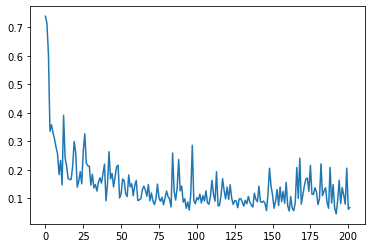

In [8]:
lr = 0.02

print(y_train.shape)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)